<a href="https://colab.research.google.com/github/juanestebanperezm/tf_imagenes/blob/main/tf_roses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Borrador guia del Sequential, no me gusta usar el add  

```
model = keras.Sequential(
    [
        layers.Dense(2, activation="relu", name="layer1"),
        layers.Dense(3, activation="relu", name="layer2"),
        layers.Dense(4, name="layer3"),
    ]
)

```

In [27]:
import matplotlib.pyplot as plt 
import numpy as np 
import os
import pandas as pd 
import PIL
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [28]:
import pathlib

url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
datos_dir = tf.keras.utils.get_file("flower_photos", origin = url, untar = True)
datos_dir = pathlib.Path(datos_dir)

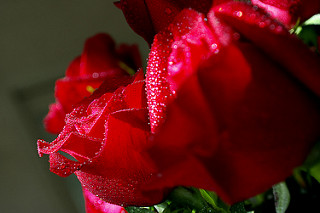

In [29]:
rosas = list(datos_dir.glob("roses/*"))
PIL.Image.open(str(rosas[1]))

In [30]:
batch_size = 32
img_height = 180
img_width = 180

In [31]:
entrenamiento_ds = keras.utils.image_dataset_from_directory(
    datos_dir,
    validation_split = .2,
    subset = "training",
    seed = 123,
    image_size = (img_height,img_width),
    batch_size = batch_size 
)

numero_clases = entrenamiento_ds.class_names



Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [32]:
validacion_ds = keras.utils.image_dataset_from_directory(
    datos_dir,
    validation_split = .2,
    subset = "validation",
    seed = 123,
    image_size = (img_height,img_width),
    batch_size = batch_size 
 )

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [33]:
AUTOTUNE = tf.data.AUTOTUNE

entrenamiento_ds = entrenamiento_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)
validacion_ds = validacion_ds.prefetch(buffer_size = AUTOTUNE)

In [34]:
capa_normalizacion = layers.Rescaling(1./255)

In [35]:
normalizado_ds = entrenamiento_ds.map( lambda x , y : (capa_normalizacion(x), y) )

imagen_batch , batch_capas = next(iter(normalizado_ds))

primer_imagen = imagen_batch[0]

In [36]:
aume = keras.Sequential( 
    [
     layers.RandomFlip("horizontal",
                       
                       input_shape = (img_height,img_width,3)
                       
                       ),
     layers.RandomRotation(0.1),
     layers.RandomZoom(0.1)
    ]
 )

In [37]:
cantidad_clases = len(numero_clases)

modelo = Sequential([
        aume,
        layers.Rescaling(1./255,input_shape = (img_height,img_width, 3)),
        layers.Conv2D(16, 3, padding = "same", activation = "relu"),
        layers.MaxPooling2D(),
        layers.Conv2D(32, 3, padding = "same", activation = "relu"),
        layers.MaxPooling2D(),
        layers.Conv2D(64, 3, padding = "same", activation = "relu" ),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(128, activation = "relu"),
        layers.Dense(cantidad_clases)

                    ])

In [38]:
modelo.compile(
    optimizer = "adam",
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = ["accuracy"]
)

In [ ]:
epochs = 15

historial = modelo.fit(
    entrenamiento_ds,
    validation_data = validacion_ds,
    epochs = epochs
)


In [45]:
flor_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
ruta_flor = tf.keras.utils.get_file('Red_sunflower', origin=flor_url)

imagen = keras.utils.load_img(
    ruta_flor, target_size = (img_height,img_width)
)

imagen_arr = keras.utils.img_to_array(imagen)
imagen_arr = tf.expand_dims(imagen_arr, 0)

prediccion = modelo.predict(imagen_arr)
puntuacion = tf.nn.softmax(prediccion[0])


print("clase mas :) {} {} % ".format(numero_clases[np.argmax(puntuacion)]
,100*np.max(puntuacion)))

clase mas :) sunflowers 87.10782527923584 % 
